## Googleドライブのマウント

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
#seaborn設定
sns.set()
#背景変更
sns.set_style("darkgrid", {'grid.linestyle': '--'})
#大きさ(スケール変更)
sns.set_context("paper")

In [5]:
n=100

# 4次関数
def true_func(x):
    z = 1-48*x+218*x**2-315*x**3+145*x**4
    return z 

# 恒等写像関数
def linear_func(x):
    z = x
    return z 

No handles with labels found to put in legend.


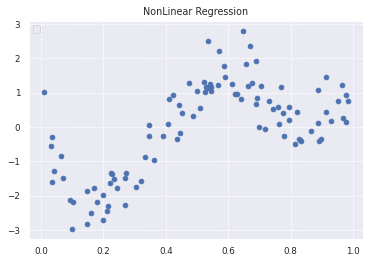

In [6]:
# 真の関数からノイズを伴うデータを生成

# 真の関数からデータ生成
data = np.random.rand(n).astype(np.float32) # n個の0〜1の数列を作成
data = np.sort(data)
target = true_func(data)

# ノイズを加える
noise = 0.5 * np.random.randn(n) 
target = target  + noise

# ノイズ付きデータを描画

plt.scatter(data, target)

plt.title('NonLinear Regression')
plt.legend(loc=2)

0.3843119512829922


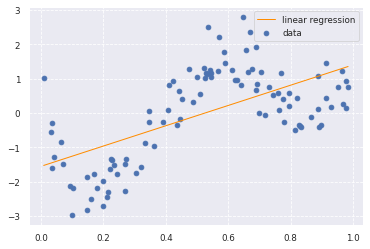

In [10]:
# 線形回帰の場合
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
data = data.reshape(-1,1) # dataを学習用にベクトルから100行1列の行列に変換
target = target.reshape(-1,1)
clf.fit(data, target)

# 学習に使った入力データで回帰
p_lin = clf.predict(data)

# 散布図を描画
plt.scatter(data, target, label='data')
# 直線を描画
plt.plot(data, p_lin, color='darkorange', marker='', linestyle='-', linewidth=1, markersize=6, label='linear regression')
plt.legend()
print(clf.score(data, target))

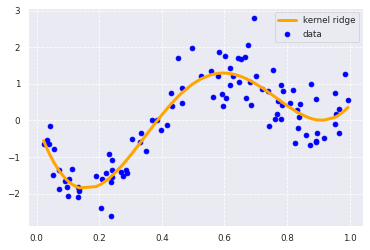

In [ ]:
# 非線形回帰の場合
from sklearn.kernel_ridge import KernelRidge # L2ノルム制約付きの最小二乗学習

clf = KernelRidge(alpha=0.0002, kernel='rbf') # alphaは正則化の強さ、kernelはカーネルの種類
clf.fit(data, target)

p_kridge = clf.predict(data)

plt.scatter(data, target, color='blue', label='data')

plt.plot(data, p_kridge, color='orange', linestyle='-', linewidth=3, markersize=6, label='kernel ridge')
plt.legend()
#plt.plot(data, p, color='orange', marker='o', linestyle='-', linewidth=1, markersize=6)

0.8700995103584797


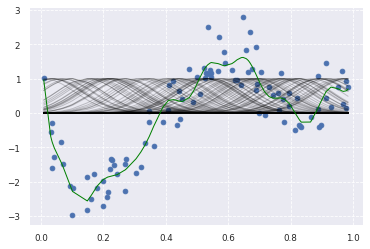

In [16]:
#Ridge

from sklearn.metrics.pairwise import rbf_kernel # RBFカーネル
from sklearn.linear_model import Ridge

kx = rbf_kernel(X=data, Y=data, gamma=50)
#KX = rbf_kernel(X, x)

clf = LinearRegression() # Ridge正則化がない場合
# clf = Ridge(alpha=30)
clf.fit(kx, target)

p_ridge = clf.predict(kx)

plt.scatter(data, target,label='data')
for i in range(len(kx)):
    plt.plot(data, kx[i], color='black', linestyle='-', linewidth=1, markersize=3, label='rbf', alpha=0.2)

#plt.plot(data, p, color='green', marker='o', linestyle='-', linewidth=0.1, markersize=3)
plt.plot(data, p_ridge, color='green', linestyle='-', linewidth=1, markersize=3,label='ridge regression')
#plt.legend()

print(clf.score(kx, target)) # 決定係数

<h2>考察</h2>

-   正則化がないと、過学習ぎみの曲線になる。
-   決定係数は高いため、決定係数の値だけで精度を判断すべきではない。


0.8170438644182713


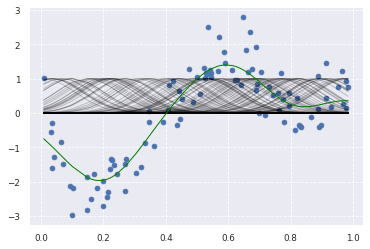

In [17]:
#Ridge

from sklearn.metrics.pairwise import rbf_kernel # RBFカーネル
from sklearn.linear_model import Ridge

kx = rbf_kernel(X=data, Y=data, gamma=50)
#KX = rbf_kernel(X, x)

# clf = LinearRegression()
clf = Ridge(alpha=30)
clf.fit(kx, target)

p_ridge = clf.predict(kx)

plt.scatter(data, target,label='data')
for i in range(len(kx)):
    plt.plot(data, kx[i], color='black', linestyle='-', linewidth=1, markersize=3, label='rbf', alpha=0.2)

#plt.plot(data, p, color='green', marker='o', linestyle='-', linewidth=0.1, markersize=3)
plt.plot(data, p_ridge, color='green', linestyle='-', linewidth=1, markersize=3,label='ridge regression')
#plt.legend()

print(clf.score(kx, target)) # 決定係数

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

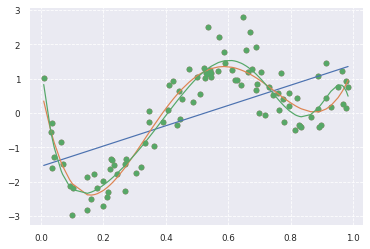

In [24]:
# 多項式の場合
# PolynomialFeatures(degree=1)

# deg = [1,2,3,4,5,6,7,8,9,10]
deg = [1,4,10]
for d in deg:
    regr = Pipeline([
        ('poly', PolynomialFeatures(degree=d)),
        ('linear', LinearRegression())
    ])
    regr.fit(data, target)
    # make predictions
    p_poly = regr.predict(data)
    # plot regression result
    plt.scatter(data, target, label='data')
    plt.plot(data, p_poly, label='polynomial of degree %d' % (d))

<h2>考察</h2>

- 1次はただの直線にしかならない。
- 10次まであげると表現力は高くなる＝データによく一致するようになるが、4次と比較してあまり変わらないため、あまり高次まで増やしても意味がない可能性がある。
- データをよく見て、適切な次数を設定する必要がある。

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.145e-01, tolerance: 1.772e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.8355274048730607


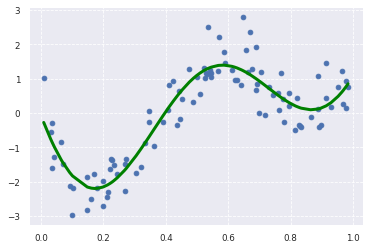

In [29]:
#Lasso回帰の場合

from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Lasso

kx = rbf_kernel(X=data, Y=data, gamma=5)
#KX = rbf_kernel(X, x)

#lasso_clf = LinearRegression()
lasso_clf = Lasso(alpha=0.001, max_iter=1000) # L1ノルムによる正則化
lasso_clf.fit(kx, target)

p_lasso = lasso_clf.predict(kx)

plt.scatter(data, target)

#plt.plot(data, p, color='green', marker='o', linestyle='-', linewidth=0.1, markersize=3)
plt.plot(data, p_lasso, color='green', linestyle='-', linewidth=3, markersize=3)

print(lasso_clf.score(kx, target))

<h2>考察</h2>

- このケースの場合は、Lasso回帰でもアルファを適切に設定すればRidge回帰と同程度の結果が得られる。
- データによって適切なモデルを検討する必要がある。

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


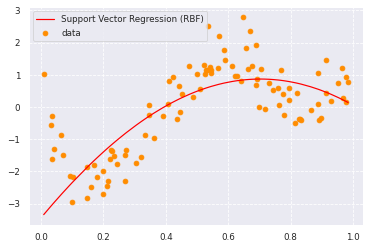

In [37]:
# SVRの場合
from sklearn import model_selection, preprocessing, linear_model, svm

# SVR-rbf
clf_svr = svm.SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon=0.1)
clf_svr.fit(data, target)
y_rbf = clf_svr.fit(data, target).predict(data)
 
# plot

plt.scatter(data, target, color='darkorange', label='data')
plt.plot(data, y_rbf, color='red', label='Support Vector Regression (RBF)')
plt.legend()
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=0)

以下では，Googleドライブのマイドライブ直下にstudy_ai_mlフォルダを置くことを仮定しています．必要に応じて，パスを変更してください。

In [51]:
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint

cb_cp = ModelCheckpoint('/content/drive/My Drive/Study-AI/skl_ml/out/checkpoints/weights.{epoch:02d}-{val_loss:.2f}.hdf5', verbose=1, save_weights_only=True)
cb_tf  = TensorBoard(log_dir='/content/drive/My Drive/Study-AI/skl_ml/out/tensorBoard', histogram_freq=0)

In [52]:
# 全結合MLPの場合
def relu_reg_model():
    model = Sequential()
    model.add(Dense(10, input_dim=1, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='linear'))
#     model.add(Dense(100, activation='relu'))
#     model.add(Dense(100, activation='relu'))
#     model.add(Dense(100, activation='relu'))
#     model.add(Dense(100, activation='relu'))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [53]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.wrappers.scikit_learn import KerasRegressor

# use data split and fit to run the model
estimator = KerasRegressor(build_fn=relu_reg_model, epochs=100, batch_size=5, verbose=1)

history = estimator.fit(x_train, y_train, callbacks=[cb_cp, cb_tf], validation_data=(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  


Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 1.6425
Epoch 00001: saving model to /content/drive/My Drive/Study-AI/skl_ml/out/checkpoints/weights.01-1.59.hdf5
18/18 [==============================] - 2s 90ms/step - loss: 1.6425 - val_loss: 1.5871
Epoch 2/100
18/18 [==============================] - ETA: 0s - loss: 1.3051
Epoch 00002: saving model to /content/drive/My Drive/Study-AI/skl_ml/out/checkpoints/weights.02-1.76.hdf5
18/18 [==============================] - 1s 63ms/step - loss: 1.3051 - val_loss: 1.7594
Epoch 3/100
18/18 [==============================] - ETA: 0s - loss: 1.2175
Epoch 00003: saving model to /content/drive/My Drive/Study-AI/skl_ml/out/checkpoints/weights.03-0.94.hdf5
18/18 [==============================] - 1s 65ms/step - loss: 1.2175 - val_loss: 0.9418
Epoch 4/100
18/18 [==============================] - ETA: 0s - loss: 0.9425
Epoch 00004: saving model to /content/drive/My Drive/Study-AI/skl_ml/out/checkpoints/weights.04-1.04.hdf5
18/18 [=

In [54]:
y_pred = estimator.predict(x_train)

18/18 [==============================] - 0s 10ms/step


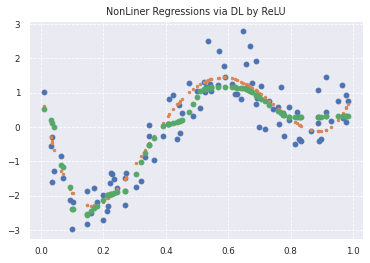

In [55]:
plt.title('NonLiner Regressions via DL by ReLU')
plt.plot(data, target, 'o')
plt.plot(data, true_func(data), '.')
plt.plot(x_train, y_pred, "o", label='predicted: deep learning')
#plt.legend(loc=2)

<h2>考察</h2>

- 今回のデータの場合、機械学習のモデルの方が真のデータに近い。
- MLPが必ずしも良いとは限らず、データによって最適なモデルを検討する必要がある。